In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd
import time
start_time = time.time()

pd.set_option('display.max_rows', 400) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format
%matplotlib inline

import statsmodels.api as sm

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/jinfenggao/CASA0007-QM_Written_Investigation/main/Seoul_Apartment.csv")
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score
0,2766,37.6816,127.0566,2000-6,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000
1,5860,37.6793,127.0570,2001-5,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000
2,15564,37.6769,127.0581,2005-2,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000
3,3700,37.6753,127.0600,1995-9,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000
4,6204,37.6764,127.0584,2003-6,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000
...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-6,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000
4017,19721,37.5317,126.8296,2009-1,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000
4018,21277,37.5316,126.8286,2010-2,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000
4019,6434,37.5310,126.8671,2003-6,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000


In [4]:
data.dtypes

ID              int64
Latitude      float64
Longitude     float64
Build_Date     object
Area            int64
Households      int64
Floors          int64
Min_price     float64
Max_price     float64
Avg_price     float64
Score         float64
dtype: object

In [5]:
data.isnull().sum()

ID             0
Latitude       0
Longitude      0
Build_Date     0
Area           0
Households     0
Floors         0
Min_price     90
Max_price     90
Avg_price     90
Score          0
dtype: int64

In [6]:
import datetime as dt
data['Build_Date'] = pd.to_datetime(data['Build_Date'], format='%Y/%m')
data['Build_Year'] = data['Build_Date'].dt.year
data['Building_Age'] = 2021 - data.Build_Year
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score,Build_Year,Building_Age
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18


In [7]:
data = data[data.Latitude > 37.43]
data = data[data.Longitude < 127.14]
data = data[data.Building_Age > 0]
data = data[data.Area > 0]
data = data[data.Floors > 0]
data = data[data.Avg_price > 0]
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score,Build_Year,Building_Age
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18


In [8]:
data['Avg_price_per'] = data.Avg_price / data.Area
data

,ID,Latitude,Longitude,Build_Date,Area,Households,Floors,Min_price,Max_price,Avg_price,Score,Build_Year,Building_Age,Avg_price_per
0,2766,37.6816,127.0566,2000-06-01,139,492,42,"60,100.0000","62,000.0000","61,000.0000",4.3000,2000,21,438.8489
1,5860,37.6793,127.0570,2001-05-01,105,468,32,"48,600.0000","52,200.0000","51,000.0000",4.1000,2001,20,485.7143
2,15564,37.6769,127.0581,2005-02-01,86,57,26,"36,000.0000","46,000.0000","40,500.0000",4.8000,2005,16,470.9302
3,3700,37.6753,127.0600,1995-09-01,102,216,31,"34,000.0000","34,800.0000","34,500.0000",4.8000,1995,26,338.2353
4,6204,37.6764,127.0584,2003-06-01,91,165,28,"27,900.0000","50,300.0000","40,000.0000",4.8000,2003,18,439.5604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,6433,37.5322,126.8668,2003-06-01,86,392,26,"53,300.0000","89,000.0000","63,000.0000",4.5000,2003,18,732.5581
4017,19721,37.5317,126.8296,2009-01-01,106,120,32,"20,100.0000","20,100.0000","20,000.0000",4.0000,2009,12,188.6792
4018,21277,37.5316,126.8286,2010-02-01,83,92,25,"18,200.0000","25,800.0000","24,000.0000",3.5000,2010,11,289.1566
4019,6434,37.5310,126.8671,2003-06-01,75,119,23,"53,500.0000","91,500.0000","70,000.0000",4.3000,2003,18,933.3333


In [9]:
data = data[['Latitude', 'Longitude', 'Build_Year', 'Building_Age', 'Area', 'Households', 'Floors','Score','Avg_price']]
data

,Latitude,Longitude,Build_Year,Building_Age,Area,Households,Floors,Score,Avg_price
0,37.6816,127.0566,2000,21,139,492,42,4.3000,"61,000.0000"
1,37.6793,127.0570,2001,20,105,468,32,4.1000,"51,000.0000"
2,37.6769,127.0581,2005,16,86,57,26,4.8000,"40,500.0000"
3,37.6753,127.0600,1995,26,102,216,31,4.8000,"34,500.0000"
4,37.6764,127.0584,2003,18,91,165,28,4.8000,"40,000.0000"
...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,4.5000,"63,000.0000"
4017,37.5317,126.8296,2009,12,106,120,32,4.0000,"20,000.0000"
4018,37.5316,126.8286,2010,11,83,92,25,3.5000,"24,000.0000"
4019,37.5310,126.8671,2003,18,75,119,23,4.3000,"70,000.0000"


In [10]:
data.columns.values

array(['Latitude', 'Longitude', 'Build_Year', 'Building_Age', 'Area',
       'Households', 'Floors', 'Score', 'Avg_price'], dtype=object)

In [11]:
data.isnull().sum()

Latitude        0
Longitude       0
Build_Year      0
Building_Age    0
Area            0
Households      0
Floors          0
Score           0
Avg_price       0
dtype: int64

In [12]:
data.dtypes

Latitude        float64
Longitude       float64
Build_Year        int64
Building_Age      int64
Area              int64
Households        int64
Floors            int64
Score           float64
Avg_price       float64
dtype: object

array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Build_Year'}>],
       [<AxesSubplot:title={'center':'Building_Age'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Households'}>],
       [<AxesSubplot:title={'center':'Floors'}>,
        <AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'Avg_price'}>]], dtype=object)

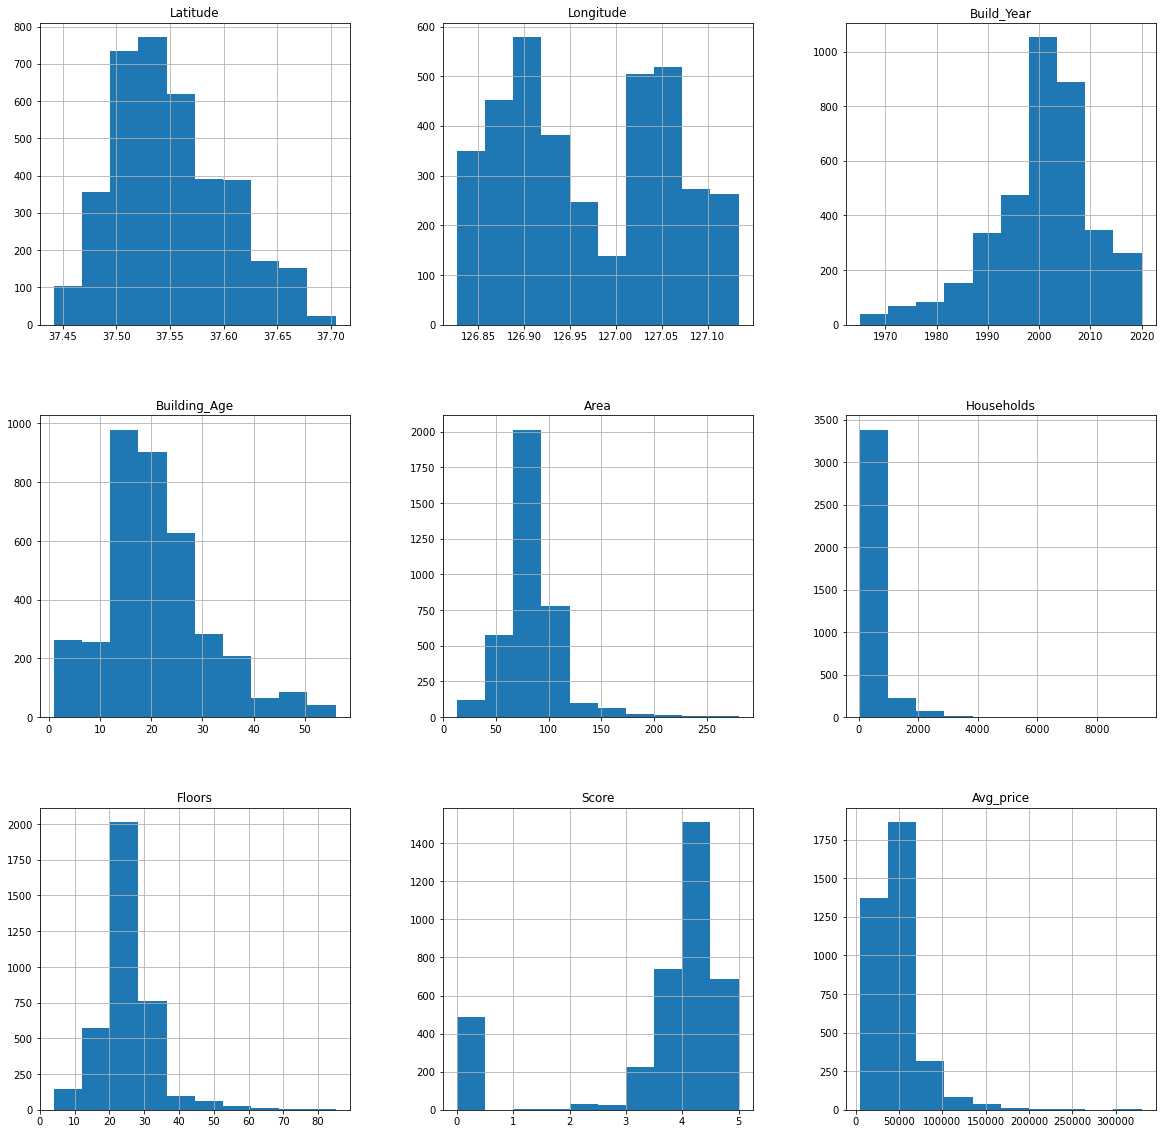

In [13]:
data.hist(figsize = (20,20))

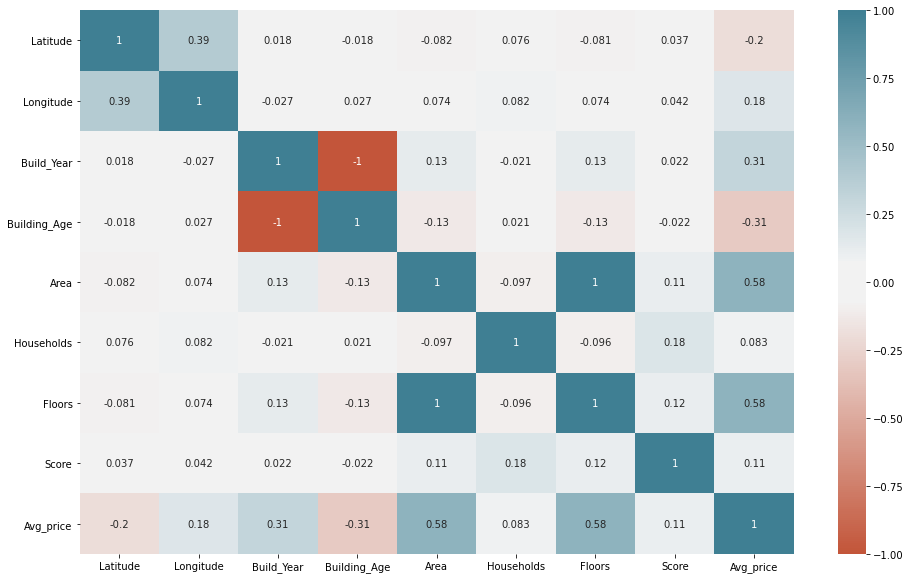

In [14]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = data.corr()

#Creating my own color palette
cmap = sns.diverging_palette(20, 220, sep=20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap)

#Display the plot
plt.show()

In [15]:
data.Avg_price.describe()

count                                 3,706.0000
mean                                 47,651.0254
std                                  27,506.6976
min                                   4,900.0000
25%                                  32,000.0000
50%                                  42,500.0000
75%                                  55,000.0000
max                                 330,000.0000
Name: Avg_price, dtype: float64

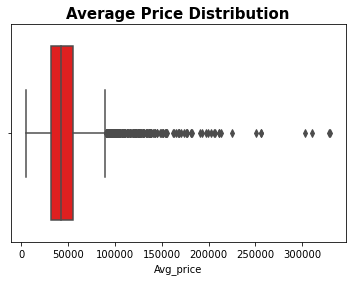

In [16]:
ax = sns.boxplot(data=data, x='Avg_price',color='red')
plt.title("Average Price Distribution",size=15, weight='bold')
plt.show()

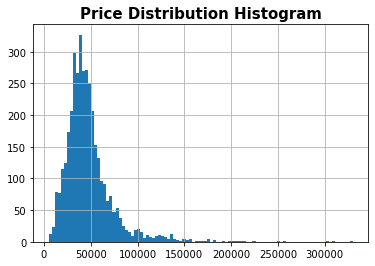

In [17]:
data['Avg_price'].hist(bins=100)
plt.title("Price Distribution Histogram",size=15, weight='bold')
plt.show()

In [18]:
test1 = pd.DataFrame({'High_Avg_price':data['Avg_price']>=np.percentile(data['Avg_price'],70)})
test1['High_Avg_price'].value_counts()

False    2562
True     1144
Name: High_Avg_price, dtype: int64

In [19]:
test = pd.concat( [data, test1], axis = 1)
test

,Latitude,Longitude,Build_Year,Building_Age,Area,Households,Floors,Score,Avg_price,High_Avg_price
0,37.6816,127.0566,2000,21,139,492,42,4.3000,"61,000.0000",True
1,37.6793,127.0570,2001,20,105,468,32,4.1000,"51,000.0000",False
2,37.6769,127.0581,2005,16,86,57,26,4.8000,"40,500.0000",False
3,37.6753,127.0600,1995,26,102,216,31,4.8000,"34,500.0000",False
4,37.6764,127.0584,2003,18,91,165,28,4.8000,"40,000.0000",False
...,...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,4.5000,"63,000.0000",True
4017,37.5317,126.8296,2009,12,106,120,32,4.0000,"20,000.0000",False
4018,37.5316,126.8286,2010,11,83,92,25,3.5000,"24,000.0000",False
4019,37.5310,126.8671,2003,18,75,119,23,4.3000,"70,000.0000",True


In [20]:
test['High_Avg_price'].value_counts()

False    2562
True     1144
Name: High_Avg_price, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit([True, False])
labels_fea = le.transform(test['High_Avg_price'])
labels_fea

array([1, 0, 0, ..., 0, 1, 0])

In [23]:
pd.Series(labels_fea).value_counts()

0    2562
1    1144
dtype: int64

In [24]:
from sklearn.feature_extraction import DictVectorizer

In [25]:
A = test.drop(['Avg_price','High_Avg_price'],axis = 1)
y = data['Avg_price']
y

0                                   61,000.0000
1                                   51,000.0000
2                                   40,500.0000
3                                   34,500.0000
4                                   40,000.0000
                         ...                   
4016                                63,000.0000
4017                                20,000.0000
4018                                24,000.0000
4019                                70,000.0000
4020                                19,500.0000
Name: Avg_price, Length: 3706, dtype: float64

In [26]:
A_dict = A.to_dict('records')
print(A_dict[1])

{'Latitude': 37.6792898, 'Longitude': 127.0570207, 'Build_Year': 2001, 'Building_Age': 20, 'Area': 105, 'Households': 468, 'Floors': 32, 'Score': 4.1}


In [27]:
vec = DictVectorizer()
A_vec_array = vec.fit_transform(A_dict).toarray()
A_vec_array.shape
A_vec_array

array([[ 139.        , 2000.        ,   21.        , ...,   37.68160372,
         127.0565917 ,    4.3       ],
       [ 105.        , 2001.        ,   20.        , ...,   37.6792898 ,
         127.0570207 ,    4.1       ],
       [  86.        , 2005.        ,   16.        , ...,   37.67688187,
         127.0580753 ,    4.8       ],
       ...,
       [  83.        , 2010.        ,   11.        , ...,   37.53158625,
         126.8286106 ,    3.5       ],
       [  75.        , 2003.        ,   18.        , ...,   37.53096909,
         126.8670965 ,    4.3       ],
       [  50.        , 2006.        ,   15.        , ...,   37.5301682 ,
         126.829991  ,    4.        ]])

In [28]:
print(vec.feature_names_[0:5])
print(vec.vocabulary_)

['Area', 'Build_Year', 'Building_Age', 'Floors', 'Households']
{'Latitude': 5, 'Longitude': 6, 'Build_Year': 1, 'Building_Age': 2, 'Area': 0, 'Households': 4, 'Floors': 3, 'Score': 7}


In [29]:
from sklearn.model_selection import train_test_split
train_d, test_d, train_lab, test_lab = train_test_split(A_vec_array, labels_fea, test_size = 0.3)

In [30]:
print(train_d.shape)
print(test_d.shape)

(2594, 8)
(1112, 8)


In [31]:
len(train_d),len(test_d),len(train_lab),len(test_lab)

(2594, 1112, 2594, 1112)

In [32]:
test_ = test.copy()
gdf = gpd.GeoDataFrame(test_, geometry=gpd.points_from_xy(test_.Longitude, test_.Latitude, crs='epsg:4326'))

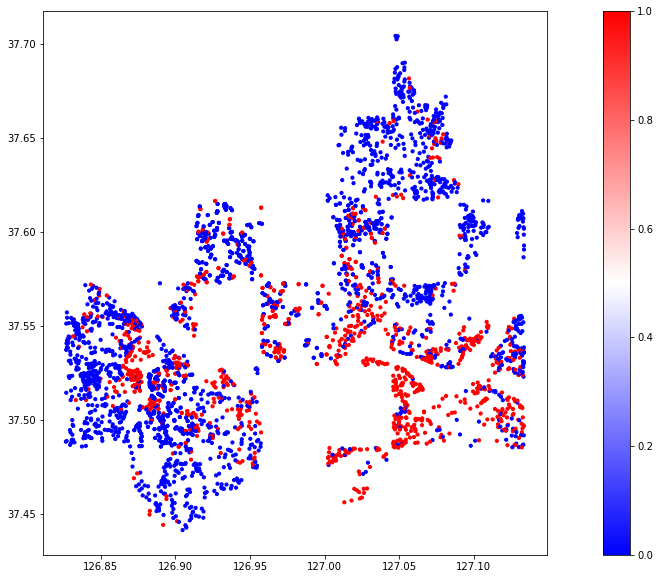

In [33]:
ax=gdf.plot(column='High_Avg_price', legend=True, markersize=10 ,figsize=(20,10), cmap='bwr', alpha=1)

In [34]:
reg_data = data.drop([], axis = 1)

In [35]:
data_numeric = pd.get_dummies(reg_data)
data_numeric

,Latitude,Longitude,Build_Year,Building_Age,Area,Households,Floors,Score,Avg_price
0,37.6816,127.0566,2000,21,139,492,42,4.3000,"61,000.0000"
1,37.6793,127.0570,2001,20,105,468,32,4.1000,"51,000.0000"
2,37.6769,127.0581,2005,16,86,57,26,4.8000,"40,500.0000"
3,37.6753,127.0600,1995,26,102,216,31,4.8000,"34,500.0000"
4,37.6764,127.0584,2003,18,91,165,28,4.8000,"40,000.0000"
...,...,...,...,...,...,...,...,...,...
4016,37.5322,126.8668,2003,18,86,392,26,4.5000,"63,000.0000"
4017,37.5317,126.8296,2009,12,106,120,32,4.0000,"20,000.0000"
4018,37.5316,126.8286,2010,11,83,92,25,3.5000,"24,000.0000"
4019,37.5310,126.8671,2003,18,75,119,23,4.3000,"70,000.0000"


In [36]:
data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3706 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Latitude      3706 non-null   float64
 1   Longitude     3706 non-null   float64
 2   Build_Year    3706 non-null   int64  
 3   Building_Age  3706 non-null   int64  
 4   Area          3706 non-null   int64  
 5   Households    3706 non-null   int64  
 6   Floors        3706 non-null   int64  
 7   Score         3706 non-null   float64
 8   Avg_price     3706 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 289.5 KB


In [37]:
data_numeric.columns.values

array(['Latitude', 'Longitude', 'Build_Year', 'Building_Age', 'Area',
       'Households', 'Floors', 'Score', 'Avg_price'], dtype=object)

In [38]:
predictors_data = data_numeric.drop('Avg_price', axis=1)
response_data = data_numeric['Avg_price']

In [39]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(predictors_data)).fit()
regressor_OLS.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     501.6
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        13:42:07   Log-Likelihood:                -41905.
No. Observations:                3706   AIC:                         8.383e+04
Df Residuals:                    3698   BIC:                         8.387e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -2.3246      0.233     -9.993      0.000      -2.781      -1.868
Latitude     -1.406e+05   6900.299    -20.372      0.000   -1.54e+05   -1.27e+05
Longitude      7.35e+04   4015.982     18.303      0.000    6.56e+04    8.14e+04
Build_Year   -1999.1815    234.014     -8.543      0.000   -2457.991   -1540.372
Building_Age -2698.7527    237.216    -11.377      0.000   -3163.841   -2233.665
Area           570.3065    343.616      1.660      0.097    -103.389    1244.002
Households       6.7532      0.600     11.251      0.000       5.576       7.930
Floors        -145.0047   1135.931     -0.128      0.898   -2372.117    2082.108
Score          298.5360    227.459      1.312      0.189    -147.422     744.494
==============================================================================
Omnibus:                     2514.477   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            67959.111
Skew:                           2.842   Prob(JB):                         0.00
Kurtosis:                      23.194   Cond. No.                     4.85e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# calculating VIF
# This function is amended from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const').drop(list_var_not_to_remove)
        
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [41]:
#select columns to keep even if they have super high VIF score
list_var_not_to_remove = []
df_predictors_select_VIF = drop_column_using_vif_(predictors_data, list_var_not_to_remove, thresh=2.5)
print("The columns remaining after VIF selection are:")
print(df_predictors_select_VIF.columns)

Max VIF: inf
Dropping: Build_Year
Max VIF: 828.9981619737401
Dropping: Area
Max VIF: 1.198717477673816
The columns remaining after VIF selection are:
Index(['Latitude', 'Longitude', 'Building_Age', 'Households', 'Floors',
       'Score'],
      dtype='object')


/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [42]:
regressor_OLS = sm.OLS(endog=response_data, exog=sm.add_constant(df_predictors_select_VIF)).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Avg_price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     584.4
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        13:42:07   Log-Likelihood:                -41906.
No. Observations:                3706   AIC:                         8.383e+04
Df Residuals:                    3699   BIC:                         8.387e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.039e+06   4.73e+05     -8.539      0.000   -4.97e+06   -3.11e+06
Latitude     -1.407e+05   6901.621    -20.384      0.000   -1.54e+05   -1.27e+05
Longitude     7.353e+04   4016.905     18.305      0.000    6.57e+04    8.14e+04
Building_Age  -700.3278     32.670    -21.437      0.000    -764.380    -636.275
Households       6.7182      0.600     11.197      0.000       5.542       7.895
Floors        1739.1083     40.794     42.631      0.000    1659.127    1819.090
Score          291.0455    227.469      1.279      0.201    -154.931     737.022
==============================================================================
Omnibus:                     2518.667   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68314.009
Skew:                           2.848   Prob(JB):                         0.00
Kurtosis:                      23.248   Cond. No.                     9.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
RF_train_d, RF_test_d, RF_train_lab, RF_test_lab = train_test_split(predictors_data, response_data, test_size = 0.3)

In [44]:
from sklearn.ensemble import RandomForestRegressor

#function to evaluate model performance
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels) #this is the MAE
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#evaluate the base model first
base_model = RandomForestRegressor(n_estimators = 10)
base_model.fit(RF_train_d, RF_train_lab)
base_accuracy = evaluate(base_model, RF_test_d, RF_test_lab)

Model Performance
Average Error: 7933.0036 degrees.
Accuracy = 81.42%.


In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10,15,20],
    'max_features': [3,4,5,6,7],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [46]:
best_grid = RandomForestRegressor(max_depth=20, max_features=7, n_estimators=1000)
best_grid.fit(RF_train_d, RF_train_lab)
grid_accuracy = evaluate(best_grid, RF_test_d, RF_test_lab)

Model Performance
Average Error: 7193.1286 degrees.
Accuracy = 82.87%.


In [47]:
feature_importances_rfreg = pd.DataFrame(best_grid.feature_importances_,
                                  index= predictors_data.columns.values,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_rfreg.head(15)

,importance
Area,0.3186
Latitude,0.1426
Longitude,0.1341
Floors,0.1212
Households,0.0913
Building_Age,0.0781
Build_Year,0.0763
Score,0.0377


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
params = {"n_neighbors" : range(1, 70)}
gridsearch = GridSearchCV(KNeighborsClassifier(), params)
gridsearch.fit(train_d, train_lab)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 70)})

In [50]:
gridsearch.best_params_

{'n_neighbors': 4}

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)  #uses the parameters found by GridSearch
knn.fit(train_d, train_lab)

KNeighborsClassifier()

In [52]:
knn.score(test_d, test_lab)

0.7473021582733813

In [53]:
predictions = knn.predict(test_d)

In [54]:
from sklearn import metrics
print("Classifcation accuracy: ")
print(metrics.accuracy_score(test_lab, predictions))

Classifcation accuracy: 
0.7473021582733813


In [55]:
print("Classification results: ")
print(metrics.classification_report(test_lab, predictions))

Classification results: 
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       758
           1       0.65      0.45      0.53       354

    accuracy                           0.75      1112
   macro avg       0.71      0.67      0.68      1112
weighted avg       0.74      0.75      0.73      1112



In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=40)
dtree.fit(train_d, train_lab)

DecisionTreeClassifier(random_state=40)

In [57]:
dtree.score(test_d, test_lab)

0.8714028776978417

In [58]:
predictions_dtree = dtree.predict(test_d)

In [59]:
print (metrics.classification_report(test_lab, predictions_dtree))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       758
           1       0.80      0.80      0.80       354

    accuracy                           0.87      1112
   macro avg       0.85      0.85      0.85      1112
weighted avg       0.87      0.87      0.87      1112



In [60]:
feature_importances_dtree = pd.DataFrame(dtree.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances_dtree.head(15)

,importance
Longitude,0.2028
Latitude,0.1966
Area,0.1898
Households,0.1377
Score,0.0944
Build_Year,0.0824
Building_Age,0.0532
Floors,0.0431


In [61]:
#for selecting parameters
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
#for cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [62]:
# values of n_estimators
parameters = {'n_estimators':[50, 100, 200, 300, 400]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'n_estimators': [50, 100, 200, 300, 400]})

In [63]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 300}
The best score is: 
0.8920592764523401


In [64]:
#now try finding the optimal depth
parameters = {'max_depth':[5,10,15,20]}
rf = RandomForestClassifier(random_state=40)

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(train_d, train_lab)

GridSearchCV(estimator=RandomForestClassifier(random_state=40),
             param_grid={'max_depth': [5, 10, 15, 20]})

In [65]:
# we can query the best parameter value and its accuracy score
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'max_depth': 20}
The best score is: 
0.889744905929877


In [66]:
forest1=RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)
forest1.fit(train_d,train_lab)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=40)

In [67]:
forest1.score(test_d, test_lab)

0.89568345323741

In [68]:
predictions_rf = forest1.predict(test_d)

In [69]:
print (metrics.classification_report(test_lab, predictions_rf))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       758
           1       0.86      0.81      0.83       354

    accuracy                           0.90      1112
   macro avg       0.88      0.87      0.88      1112
weighted avg       0.89      0.90      0.89      1112



In [70]:
# number of fold as 5
cv_fold=5

clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=40)

# call the cross_val_score function
scores = cross_val_score(clf, train_d, train_lab, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.88246628 0.88439306 0.88439306 0.9132948  0.88416988]
Accuracy: 0.89 (+/- 0.01)


In [71]:
feature_importances = pd.DataFrame(forest1.feature_importances_,
                                  index= vec.feature_names_,
                                  columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head(15)

,importance
Latitude,0.1790
Longitude,0.1619
Area,0.1502
Households,0.1310
Floors,0.1131
Build_Year,0.0907
Building_Age,0.0881
Score,0.0860
